In [735]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress
import json
import seaborn as sns
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange


In [736]:
#reading data
crime_data = "/Users/Vaidehee/Desktop/chicago_data.csv"
# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(crime_data, encoding="utf-8")
df


/Users/Vaidehee/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,officer_id_hash,...,officer_race,officer_sex,officer_years_of_service,type,violation,arrest_made,citation_issued,outcome,raw_race,raw_driver_race
0,1,1/6/12,9:00:00,700 LINCOLN W,NaN,NaN,23.0,black,male,a6d791f976,...,white,male,17.0,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,BLACK,NaN
1,2,1/1/12,0:00:00,NaN,NaN,NaN,23.0,hispanic,male,81da9fab7e,...,white,male,2.0,vehicular,DRIVING/NEVER ISSUED LICENSE,True,NaN,arrest,HISPANIC,NaN
2,3,1/1/12,1:00:00,0 NORTHWEST HWY & HILLSIDE RD S,NaN,NaN,38.0,white,female,NaN,...,NaN,NaN,NaN,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,WHITE,NaN
3,4,1/1/12,1:00:00,108 LAMON AVE N,NaN,NaN,35.0,black,male,048359e7c8,...,black,male,8.0,vehicular,IVC - FAIL TO STOP/SIGNAL CROSSWALK,True,NaN,arrest,BLACK,NaN
4,5,1/1/12,1:00:00,3451 177TH ST W,NaN,NaN,20.0,black,male,NaN,...,NaN,NaN,NaN,vehicular,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,True,NaN,arrest,BLACK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846451,846452,12/23/16,12:00:00,4359 WOLCOTT AVE S,41.814109,-87.672037,NaN,NaN,female,NaN,...,hispanic,male,10.0,vehicular,DOUBLE PARKING/NO STANDING,NaN,True,citation,NaN,NaN
846452,846453,12/7/16,13:00:00,700 LAKE SHORE DR NB N,NaN,NaN,NaN,NaN,male,NaN,...,white,male,10.0,vehicular,DISOBEY RED CIRCULAR STEADY SIGNAL STOP,NaN,True,citation,NaN,NaN
846453,846454,12/28/16,9:00:00,3904 CHICAGO AVE W,41.895682,-87.724031,NaN,NaN,male,NaN,...,white,male,16.0,vehicular,NO VALID REGISTRATION,NaN,True,citation,NaN,NaN
846454,846455,12/23/16,17:00:00,5400 LAKE SHORE DR NB N,NaN,NaN,NaN,NaN,male,NaN,...,white,male,11.0,vehicular,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,NaN,True,citation,NaN,NaN


In [737]:

df.head()

,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,officer_id_hash,...,officer_race,officer_sex,officer_years_of_service,type,violation,arrest_made,citation_issued,outcome,raw_race,raw_driver_race
0,1,1/6/12,9:00:00,700 LINCOLN W,NaN,NaN,23.0,black,male,a6d791f976,...,white,male,17.0,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,BLACK,NaN
1,2,1/1/12,0:00:00,NaN,NaN,NaN,23.0,hispanic,male,81da9fab7e,...,white,male,2.0,vehicular,DRIVING/NEVER ISSUED LICENSE,True,NaN,arrest,HISPANIC,NaN
2,3,1/1/12,1:00:00,0 NORTHWEST HWY & HILLSIDE RD S,NaN,NaN,38.0,white,female,NaN,...,NaN,NaN,NaN,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,WHITE,NaN
3,4,1/1/12,1:00:00,108 LAMON AVE N,NaN,NaN,35.0,black,male,048359e7c8,...,black,male,8.0,vehicular,IVC - FAIL TO STOP/SIGNAL CROSSWALK,True,NaN,arrest,BLACK,NaN
4,5,1/1/12,1:00:00,3451 177TH ST W,NaN,NaN,20.0,black,male,NaN,...,NaN,NaN,NaN,vehicular,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,True,NaN,arrest,BLACK,NaN


In [738]:
df.count()

raw_row_number              846456
date                        846456
time                        846456
location                    775414
lat                         641014
lng                         641014
subject_age                 212223
subject_race                224139
subject_sex                 846121
officer_id_hash             152584
officer_age                  60063
officer_race                786791
officer_sex                 786791
officer_years_of_service    784276
type                        846455
violation                   846455
arrest_made                 212249
citation_issued             639944
outcome                     846456
raw_race                    212249
raw_driver_race              11906
dtype: int64

In [739]:
list(df.columns)

['raw_row_number',
 'date',
 'time',
 'location',
 'lat',
 'lng',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'officer_age',
 'officer_race',
 'officer_sex',
 'officer_years_of_service',
 'type',
 'violation',
 'arrest_made',
 'citation_issued',
 'outcome',
 'raw_race',
 'raw_driver_race']

In [740]:
demo_df = df[['date', 'time', 'violation', 'arrest_made', 'citation_issued', 'outcome']]
demo_df.head()

,date,time,violation,arrest_made,citation_issued,outcome
0,1/6/12,9:00:00,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest
1,1/1/12,0:00:00,DRIVING/NEVER ISSUED LICENSE,True,NaN,arrest
2,1/1/12,1:00:00,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest
3,1/1/12,1:00:00,IVC - FAIL TO STOP/SIGNAL CROSSWALK,True,NaN,arrest
4,1/1/12,1:00:00,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,True,NaN,arrest


In [741]:
demo_df.count()

date               846456
time               846456
violation          846455
arrest_made        212249
citation_issued    639944
outcome            846456
dtype: int64

In [742]:
demo_df = demo_df.dropna()
demo_df.count()

date               5737
time               5737
violation          5737
arrest_made        5737
citation_issued    5737
outcome            5737
dtype: int64

In [743]:
print(demo_df.shape)

(5737, 6)


In [744]:
demo_df.time
demo_df.time.value_counts

<bound method IndexOpsMixin.value_counts of 67        20:00:00
83        22:00:00
199        1:00:00
209        5:00:00
316       22:00:00
            ...   
211871    11:00:00
212022    17:00:00
212024    18:00:00
212040    21:00:00
212078     8:00:00
Name: time, Length: 5737, dtype: object>

In [745]:
demo_df.dtypes

date               object
time               object
violation          object
arrest_made        object
citation_issued    object
outcome            object
dtype: object

In [746]:
#combine data and time column - sep by space store in space (object column) - convert to datatime format - to_datetime function
datetime = demo_df.date.str.cat(demo_df.time, sep= ' ')
datetime

67          1/1/12 20:00:00
83          1/1/12 22:00:00
199          1/3/12 1:00:00
209          1/3/12 5:00:00
316         1/3/12 22:00:00
                ...        
211871    12/28/16 11:00:00
212022    12/29/16 17:00:00
212024    12/29/16 18:00:00
212040    12/29/16 21:00:00
212078     12/30/16 8:00:00
Name: date, Length: 5737, dtype: object

In [748]:
stop_datetime = pd.to_datetime(datetime)
result = stop_datetime.dt.hour
print(result)

67        20
83        22
199        1
209        5
316       22
          ..
211871    11
212022    17
212024    18
212040    21
212078     8
Name: date, Length: 5737, dtype: int64


In [749]:
demo_df.dtypes

date               object
time               object
violation          object
arrest_made        object
citation_issued    object
outcome            object
dtype: object

In [ ]:
#demo_df.set_index('stop_datetime', inplace=True)


In [753]:
demo_df['date'] = pd.to_datetime(demo_df['date'])
demo_df['year'] = demo_df['date'].dt.year

demo_df['month'] = demo_df['date'].dt.month
demo_df['day'] = demo_df['date'].dt.day




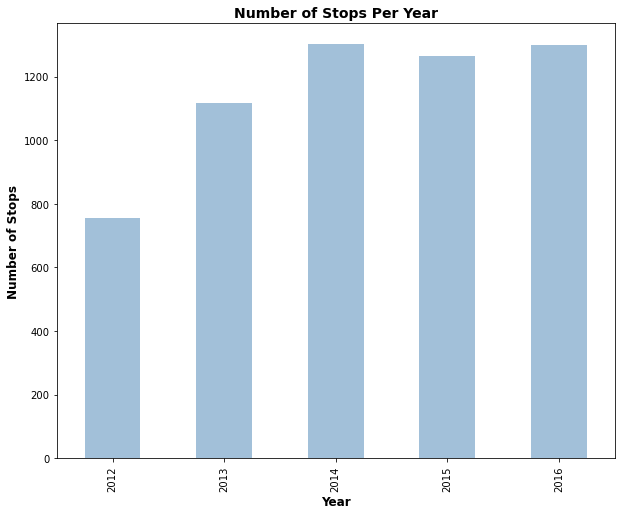

In [754]:
plt.figure(figsize=(10, 8))


demo_df.year.value_counts().sort_index().plot(kind = "bar", color='steelblue', alpha=0.5, align="center")

plt.title("Number of Stops Per Year", weight = 'bold', size=14)
plt.xlabel("Year", weight = 'bold', size=12)
plt.ylabel("Number of Stops", weight= 'bold', size=12)

plt.savefig("/Users/Vaidehee/Desktop/Number_of_Stops_Per_Year.png")


demo_df.month.value_counts().sort_index()
demo_df['month'] = demo_df['month'].apply(lambda x: calendar.month_abbr[x])



plt.figure(figsize=(10, 8))

demo_df.month.value_counts().sort_index().plot(kind = "bar", color='r', alpha=0.5, align="center")



plt.title("Number of Stops Per Month", weight = 'bold', size=14)
plt.xlabel("Month", weight = 'bold', size=12)
plt.ylabel("Number of Stops", weight= 'bold', size=12)

demo_df['month'] = pd.to_datetime(demo_df['month'], format='%m').dt.month_name().str.slice(stop=3)

demo_df.day.value_counts().sort_index()
plt.figure(figsize=(10, 8))

demo_df.day.value_counts().sort_index().plot(kind = "bar", color='r', alpha=0.5, align="center")


plt.title("Number of Stops Per Day", weight = 'bold', size=14)
plt.xlabel("Day", weight = 'bold', size=12)
plt.ylabel("Number of Stops", weight= 'bold', size=12)

In [755]:
sorted = time_count.reset_index()

sorted["index"] = pd.to_datetime(sorted["index"])

sorted = sorted.sort_values(by = 'index', ascending = True)

#sorted.set_index('index', inplace = True)


sorted


,index,time
0,2021-04-05 00:00:00,199
11,2021-04-05 01:00:00,379
16,2021-04-05 02:00:00,310
17,2021-04-05 03:00:00,207
18,2021-04-05 04:00:00,72
19,2021-04-05 05:00:00,23
20,2021-04-05 06:00:00,28
21,2021-04-05 07:00:00,31
22,2021-04-05 08:00:00,58
23,2021-04-05 09:00:00,72


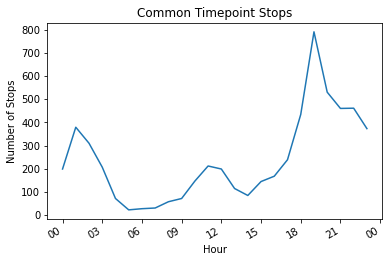

In [762]:
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

fig,ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(sorted['index'], sorted['time'])


ax.set_xlabel("Hour")
ax.set_ylabel("Number of Stops")
ax.set_title("Common Timepoint Stops")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

plt.show()

figsize=(10, 8)

fig.savefig("/Users/Vaidehee/Desktop/Common_Timepoint_Stops.png")

